# NBA homecourt advantage 분석

## 0.Introduction

취미로 즐겨하던 농구에서 응원을 받으면 평소보다 더 잘되는 것 같은 느낌이 항상 있었습니다. 여기에 더해서 대회를 참여할 때면 익숙한 코트에서는 더 성적이 잘 나왔던 경험이 있습니다. 여기서 출발하여 진짜 홈코트 어드밴티지가 있는지 살펴보고자 분석을 실시하였습니다. NBA나 KBL할 것 없이 모든 프로스포츠에서는 playoff가 되면 홈코트어드밴티지를 얻기 위해 정규시즌 성적을 잘 거두기 위해 노력하고 있기에 실제로 홈코트 어드밴티지는 적용되는지, 그리고 그중 응원이 가진 힘이 실제로 존재하는지 밝히고자 하는 것이 가장 큰 목표입니다.



---

분석에 사용한 데이터는 NBA league에 참여하고 있는 LA Lakers와 LA Clippers가 주요 데이터이며 이 두팀이 같은 코트를 사용한 1999-2000 season부터 2018-2019 season까지의 Game Log를 사용하였으며 이를 통해 원정 거리, 숙소 등의 기타 변수를 제외하고 응원이라는 한 변수만을 집중적으로 분석할 수 있을 것이라 생각합니다.


---

첫 Raw data로 이용하였던 자료인 LAclippers.csv는 기준 팀으로 삼은 LA Clippers의 매 시즌 게임 결과를 이용하였습니다. 허나 추후에 시즌이 2년에 걸쳐져서 기록이 되어있기 때문에 분석과정에서 문제가 발생하였고 이를 수정하기 위해 새로운 raw data를 사용하였습니다.

---
*참고사항
NBA의 한 시즌 정규리그 경기는 총 82경기이며, 단축시즌인 11-12(66경기)를 제외하고는 82경기로 이뤄져 있습니다. 경기 스케쥴은 시즌마다 상이하나 일반적으로

다른 컨퍼런스 15개 팀과 2경기 = 30경기

같은 지구 4개 팀과 4경기 = 16경기

같은 컨퍼런스 다른 지구 10개 팀 중 6개 팀과 4경기 =24경기

같은 컨퍼런스 다른 지구 10개 팀 중 나머지 4개 팀과 3경기 =12경기

이렇게 해서 총 82경기가 구성되어집니다.

데이터 중 팀명이 변경된 경우가 있으며

Charlotte Bobcats = Charlotte Hornets  
Vancouver Grizzlies = Memphis Grizzlies  
New Orleans Hornets = New Orleans Pelicans  
New Jersey Nets = Brooklyn Nets  
New Orleans/Oklahoma City Hornets, Seattle SuperSonics =   Oklahoma City Thunder
  로 처리하였습니다(최근 팀명)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#필요 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import mean
from scipy.stats import ttest_ind
from scipy.stats import binom_test

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 처음 가져온 raw data 실행

In [0]:
#첫 시도는 raw data를  가져와서 수정하는 과정을 거쳤습니다

# dir = '/content/drive/My Drive/Colab Notebooks/NBA_statistics/'
# data = pd.read_csv(dir +'LAclippers.csv')

# #단변적인 Game Log가 들어있는 data 불러오기(LA clippers 기준 데이터)

# data.head

# #데이터 확인

# split = data.score.str.split(',')
# split

# #데이터들이 구분되어 있지 않은 것을 확인했고, 여기서 column을 분리시켜줌

# split = split.apply(lambda x: pd.Series(x))
# split

# #분리한 column들을 dataframe으로 재저장

# split.columns

# split.columns = ["G","Date","Start (ET)","","","Home","Opponent","Result","","Tm","Opp","W","L","Streak","Notes"]

# new_df = split.drop(split.columns[[0,2,3,4,14]], axis = 'columns')

# #column명들을 재입력해주었고, 필요없는 데이터인 경기시간, 박스스코어, 비고란 등을 제거해주고 새롭게 저장

# new_df.head(83)

# new_df.to_csv(dir+"Newdata.csv")

# #새롭게 만든 정제데이터를 "Newdata"란 이름으로 저장

In [8]:
dir = '/content/drive/My Drive/Colab Notebooks/NBA_statistics/' #csv파일 저장공간

data = pd.read_csv(dir + 'Newdata.csv')

data

# 하지만 분석 진행 중에 문제 발견 : NBA리그의 특징상 시즌 개막일과 폐막일이 상이하여
# Date를 가지고 split하기엔 시간과 노력이 많이 투자되어야 함을 발견
# Raw data 변경 실시 

,Unnamed: 0,Date,Home,Opponent,Result,Tm,Opp,W,L,Streak
0,1,Tue Nov 2 1999,NaN,Seattle SuperSonics,L,92,104,0,1,L 1
1,2,Wed Nov 3 1999,@,Portland Trail Blazers,L,98,121,0,2,L 2
2,3,Fri Nov 5 1999,NaN,Philadelphia 76ers,W,91,81,1,2,W 1
3,4,Mon Nov 8 1999,NaN,Utah Jazz,L,79,94,1,3,L 1
4,5,Wed Nov 10 1999,NaN,San Antonio Spurs,L,94,99,1,4,L 2
...,...,...,...,...,...,...,...,...,...,...
1619,1620,Sun Mar 31 2019,NaN,Memphis Grizzlies,W,113,96,47,31,W 2
1620,1621,Wed Apr 3 2019,NaN,Houston Rockets,L,103,135,47,32,L 1
1621,1622,Fri Apr 5 2019,NaN,Los Angeles Lakers,L,117,122,47,33,L 2
1622,1623,Sun Apr 7 2019,@,Golden State Warriors,L,104,131,47,34,L 3


## 1.LAC 기준으로 만든 스코어 보드 데이터

In [11]:
NBA = pd.read_csv(dir + 'NBA.csv')

NBA.head(3)

#season이 column으로 추가된 데이터 불러옴
#시즌이 필요한 이유는 추후 설명 예정

#관심 정보인 홈과 원정 여부는 홈 - "" / 원정 - "@"로 나와있는 것을 확인

,Season,G,Date,Stadium,Opponent,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG_opp,FGA_opp,FG%_opp,3P_opp,3PA_opp,3P%_opp,FT_opp,FTA_opp,FT%_opp,ORB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp
0,1999,1,1999-11-02,NaN,Seattle SuperSonics,L,92,104,35,78,0.449,6,16,0.375,16,27,0.593,12,45,14,4,9,17,24,NaN,33,87,0.379,8,24,0.333,33,42,0.786,14,56,20,6,9,10,22
1,1999,2,1999-11-03,@,Portland Trail Blazers,L,98,121,36,80,0.450,1,8,0.125,25,30,0.833,10,29,15,10,2,11,27,NaN,34,95,0.358,7,33,0.212,17,23,0.739,15,52,18,5,4,12,29
2,1999,3,1999-11-05,NaN,Philadelphia 76ers,W,91,81,30,69,0.435,4,8,0.500,27,31,0.871,12,52,16,5,19,29,26,NaN,43,89,0.483,15,35,0.429,11,15,0.733,6,35,28,6,6,12,23


In [22]:
#현재는 Margin(점수차)를 알 수 없기 때문에 새로운 column - Score 생성

NBA['Score'] = NBA.apply(lambda x : x.Tm - x.Opp, axis = 'columns')

NBA.head(3)

,Season,G,Date,Stadium,Opponent,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG_opp,FGA_opp,FG%_opp,3P_opp,3PA_opp,3P%_opp,FT_opp,FTA_opp,FT%_opp,ORB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp,Score
0,1999,1,1999-11-02,NaN,Seattle SuperSonics,L,92,104,35,78,0.449,6,16,0.375,16,27,0.593,12,45,14,4,9,17,24,NaN,33,87,0.379,8,24,0.333,33,42,0.786,14,56,20,6,9,10,22,-12
1,1999,2,1999-11-03,@,Portland Trail Blazers,L,98,121,36,80,0.450,1,8,0.125,25,30,0.833,10,29,15,10,2,11,27,NaN,34,95,0.358,7,33,0.212,17,23,0.739,15,52,18,5,4,12,29,-23
2,1999,3,1999-11-05,NaN,Philadelphia 76ers,W,91,81,30,69,0.435,4,8,0.500,27,31,0.871,12,52,16,5,19,29,26,NaN,43,89,0.483,15,35,0.429,11,15,0.733,6,35,28,6,6,12,23,10


In [0]:
# 홈-원정 데이터 분리 실시

Home = NBA["Stadium"] != "@"
Away = NBA["Stadium"] == "@"

Home = NBA[Home]
Away = NBA[Away]

In [24]:
Home.info

<bound method DataFrame.info of       Season   G        Date Stadium  ... BLK_opp TOV_opp  PF_opp  Score
0       1999   1  1999-11-02     NaN  ...       9      10      22    -12
2       1999   3  1999-11-05     NaN  ...       6      12      23     10
3       1999   4  1999-11-08     NaN  ...       8       8      24    -15
4       1999   5  1999-11-10     NaN  ...       7      13      27     -5
10      1999  11  1999-11-23     NaN  ...       8       6      20      5
...      ...  ..         ...     ...  ...     ...     ...     ...    ...
1618    2018  77  2019-03-30     NaN  ...       1      18      21     24
1619    2018  78  2019-03-31     NaN  ...       8      13      21     17
1620    2018  79  2019-04-03     NaN  ...       1      13      29    -32
1621    2018  80  2019-04-05     NaN  ...       6      20      32     -5
1623    2018  82  2019-04-10     NaN  ...       7      12      21      6

[812 rows x 42 columns]>

In [25]:
Away.info

#812/812 분리 확인

<bound method DataFrame.info of       Season   G        Date Stadium  ... BLK_opp TOV_opp  PF_opp  Score
1       1999   2  1999-11-03       @  ...       4      12      29    -23
5       1999   6  1999-11-14       @  ...       3      14      16    -20
6       1999   7  1999-11-16       @  ...       6      15      35     -8
7       1999   8  1999-11-17       @  ...       7      14      30      4
8       1999   9  1999-11-19       @  ...       4      10      24     -6
...      ...  ..         ...     ...  ...     ...     ...     ...    ...
1614    2018  73  2019-03-22       @  ...       7      12      20      2
1615    2018  74  2019-03-24       @  ...       4      13      12     11
1616    2018  75  2019-03-26       @  ...       5      10      23     11
1617    2018  76  2019-03-28       @  ...       3      12      23    -10
1622    2018  81  2019-04-07       @  ...       2      17      16    -27

[812 rows x 42 columns]>

In [26]:
#기초통계량 확인

NBA["Score"].describe()

count    1624.000000
mean       -0.870074
std        13.929795
min       -46.000000
25%       -10.000000
50%        -2.000000
75%         9.000000
max        48.000000
Name: Score, dtype: float64

In [27]:
Home["Score"].describe()

count    812.000000
mean       2.096059
std       13.724545
min      -41.000000
25%       -7.000000
50%        3.000000
75%       11.000000
max       45.000000
Name: Score, dtype: float64

In [28]:
Away["Score"].describe()

count    812.000000
mean      -3.836207
std       13.503218
min      -46.000000
25%      -13.000000
50%       -5.000000
75%        6.000000
max       48.000000
Name: Score, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


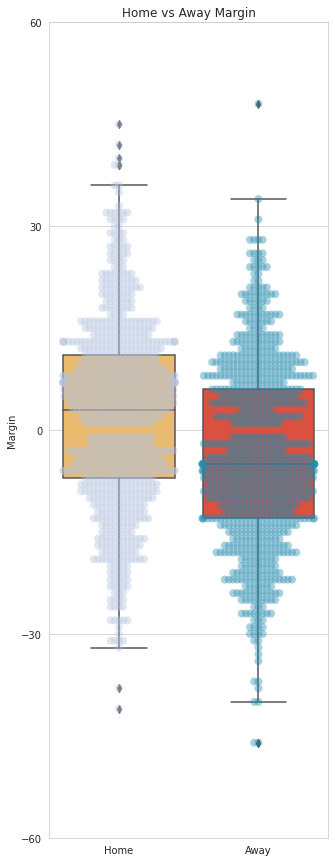

In [71]:
#boxplot과 swarmplot을 이용하여 시각화
#비교의 용이를 위해 Score dataframe 생성

Home.rename(columns = {"Score": "Home"}, inplace = True)
Away.rename(columns = {"Score": "Away"}, inplace = True)

#위에서 index column을 보면 812로 끝나는게 아니라 1624로 끝나기 때문에 합칠시 결측치 발생
#이를 예방하기 위해 index을 개수로 다시 만들어줌

Home = Home.reset_index(drop = True)
Away = Away.reset_index(drop = True)

Score = pd.concat([Home["Home"], Away["Away"]], axis = 1)
Score


fig, ax = plt.subplots(figsize = (10, 18))
sns.set_style("whitegrid")
plt.axis([0,0,-60, 60])

ax1 = sns.swarmplot(palette = "PuBuGn", data = Score, alpha = 0.4, s = 8)
ax1 = sns.boxplot(palette = "YlOrRd", data = Score, color = "1",)
ax1.set(ylabel= "Margin")
ax1.set_yticks([60, 30, 0, -30, -60])

plt.title("Home vs Away Margin")

fig.set_size_inches(5, 15)

plt.show()

# home의 경우 away에 비해 margin의 Mean이 높은 것을 확인 
# 농구의 경우 무승부가 없기 때문에 0의 값이 비어있음
# 밑의 그림을 보면 홈코트의 이점이 있다는 일반적인 상식이 맞다라는 것을 확인가능

In [44]:
stats.ttest_ind(NBA.loc[NBA.Stadium != '@', 'Score'], NBA.loc[NBA.Stadium == '@', 'Score'])

# pvalue = 4.070290691801552e-18

# pvalue < 2.22e-16

Ttest_indResult(statistic=8.779854566893311, pvalue=4.070290691801552e-18)

## 2.SRS 적용

### 여기서 들 수 있는 의문은 팀 별로 전력차가 있기 때문에 이를 고려하지 않고 홈코트 어드밴티지가 과연 있다고 말할 수 있냐는 점

### SRS : Simple Rating System


---


Equation 

EX) A, B ... Z 팀 존재

$SRS_A$ = $Margin_A$ + ($1/25$)*($SRS_B$ + $SRS_C$ + ... + $SRS_Z$)

$SRS_B$ = $Margin_B$ + ($1/25$)*($SRS_A$ + $SRS_C$ + ... + $SRS_Z$)

.
.
.
$SRS_Z$ = $Margin_Z$ + ($1/25$)*($SRS_A$ + $SRS_B$ + ... + $SRS_Y$)



---
#### 적용 예시

A팀 - 10점 
B팀 - -10점

실제 점수차 25점 A 승리

원래는 20점차 나야 하는데 25점차가 났다 => 5로 조정

예를 들어 2006-07 스퍼스는 경기당 평균 8.43점 차로 승리했고 평균보다 0.08점 낮은 상대와 일정을 소화해 SRS 8.35점을 줬다. 이는 그들이 평균 팀보다 8.35점 더 뛰어나다는 것을 의미한다.

In [49]:
SRS = pd.read_csv(dir + "SRS.csv")

SRS

# Column설명 : 
# 해당시즌(1999-2000의 경우 : 1999) / 팀(Opponent) - LAC의 상대팀 /
# Tm_SRS(LAC의 해당시즌 SRS) / Opp_SRS(상대팀 해당 시즌 SRS)

,Season,Team,Tm_SRS,Opp_SRS
0,1999,Atlanta Hawks,-10.73,-5.41
1,1999,Boston Celtics,-10.73,-1.00
2,1999,Charlotte Hornets,-10.73,2.33
3,1999,Chicago Bulls,-10.73,-9.23
4,1999,Cleveland Cavaliers,-10.73,-3.64
...,...,...,...,...
590,2018,Phoenix Suns,1.09,-8.61
591,2018,Portland Trail Blazers,1.09,4.43
592,2018,Sacramento Kings,1.09,-0.81
593,2018,San Antonio Spurs,1.09,1.80


In [51]:
#수치 조정할 SRS column 생성

SRS['Adj_SRS'] = SRS.apply(lambda x : x.Tm_SRS - x.Opp_SRS, axis = 'columns')

SRS

,Season,Opponent,Tm_SRS,Opp_SRS,Adj_SRS
0,1999,Atlanta Hawks,-10.73,-5.41,-5.32
1,1999,Boston Celtics,-10.73,-1.00,-9.73
2,1999,Charlotte Hornets,-10.73,2.33,-13.06
3,1999,Chicago Bulls,-10.73,-9.23,-1.50
4,1999,Cleveland Cavaliers,-10.73,-3.64,-7.09
...,...,...,...,...,...
590,2018,Phoenix Suns,1.09,-8.61,9.70
591,2018,Portland Trail Blazers,1.09,4.43,-3.34
592,2018,Sacramento Kings,1.09,-0.81,1.90
593,2018,San Antonio Spurs,1.09,1.80,-0.71


In [76]:
#Game Log data에 조정된 Adj_score 추가

my_nba = NBA[["Stadium" ,"Season", "Opponent", "Score"]] # Adj_Score 계산에 쓸 변수만 뽑음

# merge하기 위하여 변수 명 바꿔줌 (Team -> Opponent)
org = SRS.columns.values

org[1] = "Opponent"
SRS.columns = org

my_srs = pd.merge(my_nba, SRS, how = "outer", on = ['Season', "Opponent"])
my_srs["Adj_score"] = my_srs.Score - my_srs.Adj_SRS

my_srs

,Stadium,Season,Opponent,Score,Tm_SRS,Opp_SRS,Adj_SRS,Adj_score
0,NaN,1999,Seattle SuperSonics,-12.0,-10.73,1.17,-11.90,-0.10
1,@,1999,Seattle SuperSonics,-5.0,-10.73,1.17,-11.90,6.90
2,NaN,1999,Seattle SuperSonics,-13.0,-10.73,1.17,-11.90,-1.10
3,@,1999,Seattle SuperSonics,8.0,-10.73,1.17,-11.90,19.90
4,@,1999,Portland Trail Blazers,-23.0,-10.73,6.36,-17.09,-5.91
...,...,...,...,...,...,...,...,...
1639,NaN,2014,Los Angeles Clippers,NaN,6.80,6.80,0.00,NaN
1640,NaN,2015,Los Angeles Clippers,NaN,4.13,4.13,0.00,NaN
1641,NaN,2016,Los Angeles Clippers,NaN,4.42,4.42,0.00,NaN
1642,NaN,2017,Los Angeles Clippers,NaN,0.15,0.15,0.00,NaN


In [77]:
# my_srs.info()

# 기존 1624 X 8 구조에서 20개의 행 늘어난 것을 확인

#결측치 확인 결과 기존의 데이터에 영향 없음 확인 --> 제거
my_srs.Adj_score.isnull().sum()

my_srs = my_srs.iloc[:1624]

#데이터 정제 확인
my_srs

,Stadium,Season,Opponent,Score,Tm_SRS,Opp_SRS,Adj_SRS,Adj_score
0,NaN,1999,Seattle SuperSonics,-12.0,-10.73,1.17,-11.90,-0.10
1,@,1999,Seattle SuperSonics,-5.0,-10.73,1.17,-11.90,6.90
2,NaN,1999,Seattle SuperSonics,-13.0,-10.73,1.17,-11.90,-1.10
3,@,1999,Seattle SuperSonics,8.0,-10.73,1.17,-11.90,19.90
4,@,1999,Portland Trail Blazers,-23.0,-10.73,6.36,-17.09,-5.91
...,...,...,...,...,...,...,...,...
1619,NaN,2018,Boston Celtics,25.0,1.09,3.90,-2.81,27.81
1620,NaN,2018,New York Knicks,21.0,1.09,-8.93,10.02,10.98
1621,@,2018,New York Knicks,11.0,1.09,-8.93,10.02,0.98
1622,@,2018,Cleveland Cavaliers,2.0,1.09,-9.39,10.48,-8.48


In [0]:
# 홈-원정 데이터 분리 실시

home_srs = my_srs["Stadium"] != "@"
away_srs = my_srs["Stadium"] == "@"

home_srs = my_srs[home_srs]
away_srs = my_srs[away_srs]

In [111]:
#홈 데이터 확인
home_srs.head(3)

,Stadium,Season,Opponent,Score,Tm_SRS,Opp_SRS,Adj_SRS,Home
0,NaN,1999,Seattle SuperSonics,-12.0,-10.73,1.17,-11.90,-0.10
1,NaN,1999,Seattle SuperSonics,-13.0,-10.73,1.17,-11.90,-1.10
2,NaN,1999,Portland Trail Blazers,-17.0,-10.73,6.36,-17.09,0.09


In [112]:
#원정 데이터 확인
away_srs.head(3)

,Stadium,Season,Opponent,Score,Tm_SRS,Opp_SRS,Adj_SRS,Away
0,@,1999,Seattle SuperSonics,-5.0,-10.73,1.17,-11.90,6.90
1,@,1999,Seattle SuperSonics,8.0,-10.73,1.17,-11.90,19.90
2,@,1999,Portland Trail Blazers,-23.0,-10.73,6.36,-17.09,-5.91


In [81]:
#기초통계량 재확인

my_srs.Adj_score.describe()

count    1624.000000
mean       -0.000172
std        11.943283
min       -39.070000
25%        -7.987500
50%        -0.095000
75%         7.942500
max        35.400000
Name: Adj_score, dtype: float64

In [82]:
home_srs.Adj_score.describe()

count    812.000000
mean       2.974803
std       11.602522
min      -38.570000
25%       -5.152500
50%        2.780000
75%       10.745000
max       35.130000
Name: Adj_score, dtype: float64

In [83]:
away_srs.Adj_score.describe()

count    812.000000
mean      -2.975148
std       11.537704
min      -39.070000
25%      -10.537500
50%       -3.315000
75%        4.740000
max       35.400000
Name: Adj_score, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


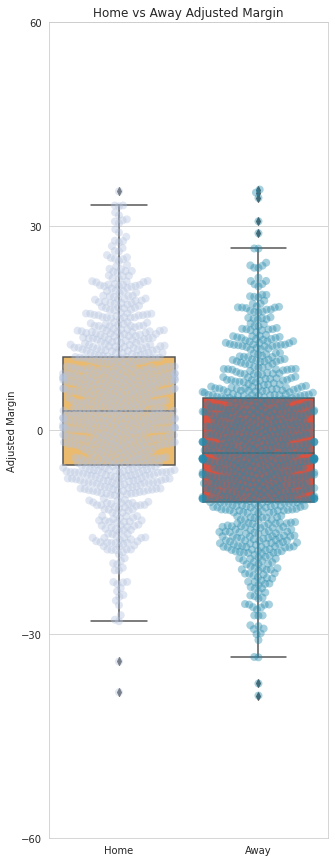

In [92]:
#boxplot과 swarmplot을 이용하여 시각화
#비교의 용이를 위해 Score dataframe 생성

home_srs.rename(columns = {"Adj_score": "Home"}, inplace = True)
away_srs.rename(columns = {"Adj_score": "Away"}, inplace = True)

Score_srs = pd.concat([home_srs["Home"], away_srs["Away"]], axis = 1)
Score_srs


fig, ax = plt.subplots(figsize = (10, 18))
sns.set_style("whitegrid")
plt.axis([0,0,-60, 60])

ax1 = sns.swarmplot(palette = "PuBuGn", data = Score_srs, alpha = 0.4, s = 8)
ax1 = sns.boxplot(palette = "YlOrRd", data = Score_srs, color = "1",)
ax1.set(ylabel= "Adjusted Margin")
ax1.set_yticks([60, 30, 0, -30, -60])

plt.title("Home vs Away Adjusted Margin")

fig.set_size_inches(5, 15)

plt.show()

# 큰 차이는 눈으로 확인할 수 없음
# Margin = 0 값이 사라짐 확인
# Home과 Away의 점수차가 조금 더 줄어든 것 확인 - 전력으로 인한 수치가 보정된 것으로 예측 가능
# 기본 Score에 비해 Adj_Score가 Mean에 가까워졌음을 확인 - LAC의 경우 전력에 비해
# garbage game win & lose(큰 점수차)가 많았을 것을 예측 가능

In [93]:
stats.ttest_ind(Score_srs["Home"], Score_srs["Away"])

# pvalue = 2.0940262265481106e-24

# pvalue < 2.22e-16

Ttest_indResult(statistic=10.361844777420949, pvalue=2.0940262265481106e-24)

## 3.LAC 기준으로 LAL와 나머지 팀들간의 경기 비교

In [0]:
#LAL와의 경기와 나머지 팀들과의 경기를 홈/원정으로 분리해서 비교

LAL_home_srs= home_srs.loc[home_srs.Opponent == "Los Angeles Lakers"]
Other_home_srs= home_srs.loc[home_srs.Opponent != "Los Angeles Lakers"]

LAL_away_srs= away_srs.loc[away_srs.Opponent == "Los Angeles Lakers"]
Other_away_srs= away_srs.loc[away_srs.Opponent != "Los Angeles Lakers"]


LAL = pd.concat([LAL_home_srs["Home"], LAL_away_srs["Away"]], axis = 1)
Other = pd.concat([Other_home_srs["Home"], Other_away_srs["Away"]], axis = 1)

[Text(0, 0.5, 'Margin'), Text(0.5, 1.0, 'Other')]

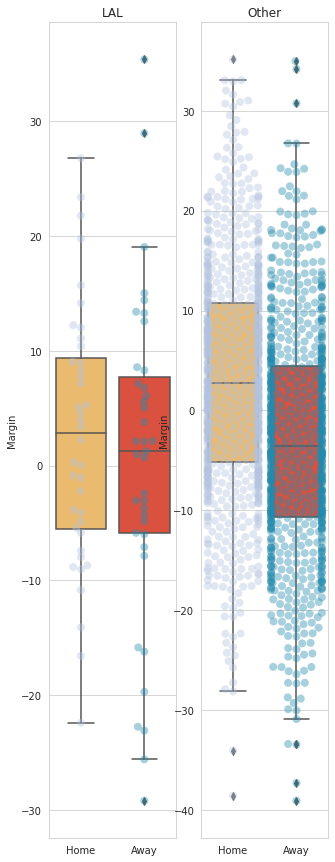

In [96]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(5,15)

sns.set_style("whitegrid")

sns.swarmplot(palette = "PuBuGn", data = LAL, alpha = 0.4, s = 8, ax = ax1)
sns.boxplot(palette = "YlOrRd", data = LAL, color = "1", ax = ax1)
ax1.set(ylabel= "Margin", title = "LAL")

sns.swarmplot(palette = "PuBuGn", data = Other, alpha = 0.4, s = 8, ax = ax2)
sns.boxplot(palette = "YlOrRd", data = Other, color = "1", ax = ax2)
ax2.set(ylabel= "Margin", title = "Other")

#나머지 팀들과 비교했을 때 홈-원정의 Margin이 유의미한 결과를 보인다 할 수 없을 정돌로 유사한 모습
#원정의 경우에 더 큰 점수차로 이긴 경우도 존재

### LAL vs Others

LAL와 나머지 팀들과의 결과를 확인하면 나머지팀들의 경우 홈과 원정의 유의미한 차이가 존재함을 확인할 수 있었으나 LAL의 경우 유의미한 의미를 도출하기 어려움

**홈팬들의 응원이라는 요소가 경기력에 유의미한 영향을 미치지 않음을 확인**


In [105]:
stats.ttest_ind(LAL_home_srs["Home"], LAL_away_srs["Away"])

# pvalue = 0.4489531654557489

# 두 항목이 유의미한 차이가 없음을 확인

Ttest_indResult(statistic=0.7610474499265882, pvalue=0.4489531654557489)

In [107]:
stats.ttest_ind(Other_home_srs["Home"], Other_away_srs["Away"])

# pvalue = 6.540347865579921e-25

# pvalue < 2.22e-16

Ttest_indResult(statistic=10.488898290091717, pvalue=6.540347865579921e-25)

## 4.각 팀별로 비교하기

In [0]:
ATL_home= home_srs.loc[home_srs.Opponent == "Atlanta Hawks"]
ATL_away= away_srs.loc[away_srs.Opponent == "Atlanta Hawks"]
ATL = pd.concat([ATL_home["Home"], ATL_away["Away"]], axis = 1)

BOS_home= home_srs.loc[home_srs.Opponent == "Boston Celtics"]
BOS_away= away_srs.loc[away_srs.Opponent == "Boston Celtics"]
BOS = pd.concat([BOS_home["Home"], BOS_away["Away"]], axis = 1)

BRK_home= home_srs.loc[home_srs.Opponent.isin(["Brooklyn Nets", "New Jersey Nets"])]
BRK_away= away_srs.loc[away_srs.Opponent.isin(["Brooklyn Nets", "New Jersey Nets"])]
BRK = pd.concat([BRK_home["Home"], BRK_away["Away"]], axis = 1)

CHA_home= home_srs.loc[home_srs.Opponent.isin(["Charlotte Hornets", "Charlotte Bobcats"])]
CHA_away= away_srs.loc[away_srs.Opponent.isin(["Charlotte Hornets", "Charlotte Bobcats"])]
CHA = pd.concat([CHA_home["Home"], CHA_away["Away"]], axis = 1)

CHI_home= home_srs.loc[home_srs.Opponent.isin(["Chicago Bulls"])]
CHI_away= away_srs.loc[away_srs.Opponent.isin(["Chicago Bulls"])]
CHI = pd.concat([CHI_home["Home"], CHI_away["Away"]], axis = 1)

CLE_home= home_srs.loc[home_srs.Opponent.isin(["Cleveland Cavaliers"])]
CLE_away= away_srs.loc[away_srs.Opponent.isin(["Cleveland Cavaliers"])]
CLE = pd.concat([CLE_home["Home"], CLE_away["Away"]], axis = 1)

DAL_home= home_srs.loc[home_srs.Opponent.isin(["Dallas Mavericks"])]
DAL_away= away_srs.loc[away_srs.Opponent.isin(["Dallas Mavericks"])]
DAL = pd.concat([DAL_home["Home"], DAL_away["Away"]], axis = 1)

DEN_home= home_srs.loc[home_srs.Opponent.isin(["Denver Nuggets"])]
DEN_away= away_srs.loc[away_srs.Opponent.isin(["Denver Nuggets"])]
DEN = pd.concat([DEN_home["Home"], DEN_away["Away"]], axis = 1)

DET_home= home_srs.loc[home_srs.Opponent.isin(["Detroit Pistons"])]
DET_away= away_srs.loc[away_srs.Opponent.isin(["Detroit Pistons"])]
DET = pd.concat([DET_home["Home"], DET_away["Away"]], axis = 1)

GSW_home= home_srs.loc[home_srs.Opponent.isin(["Golden State Warriors"])]
GSW_away= away_srs.loc[away_srs.Opponent.isin(["Golden State Warriors"])]
GSW = pd.concat([GSW_home["Home"], GSW_away["Away"]], axis = 1)

HOU_home= home_srs.loc[home_srs.Opponent.isin(["Houston Rockets"])]
HOU_away= away_srs.loc[away_srs.Opponent.isin(["Houston Rockets"])]
HOU = pd.concat([HOU_home["Home"], HOU_away["Away"]], axis = 1)

IND_home= home_srs.loc[home_srs.Opponent.isin(["Indiana Pacers"])]
IND_away= away_srs.loc[away_srs.Opponent.isin(["Indiana Pacers"])]
IND = pd.concat([IND_home["Home"], IND_away["Away"]], axis = 1)

MEM_home= home_srs.loc[home_srs.Opponent.isin(["Memphis Grizzlies", "Vancouver Grizzlies"])]
MEM_away= away_srs.loc[away_srs.Opponent.isin(["Memphis Grizzlies", "Vancouver Grizzlies"])]
MEM = pd.concat([MEM_home["Home"], MEM_away["Away"]], axis = 1)

MIA_home= home_srs.loc[home_srs.Opponent.isin(["Miami Heat"])]
MIA_away= away_srs.loc[away_srs.Opponent.isin(["Miami Heat"])]
MIA = pd.concat([MIA_home["Home"], MIA_away["Away"]], axis = 1)

MIL_home= home_srs.loc[home_srs.Opponent.isin(["Milwaukee Bucks"])]
MIL_away= away_srs.loc[away_srs.Opponent.isin(["Milwaukee Bucks"])]
MIL = pd.concat([MIA_home["Home"], MIL_away["Away"]], axis = 1)

MIN_home= home_srs.loc[home_srs.Opponent.isin(["Minnesota Timberwolves"])]
MIN_away= away_srs.loc[away_srs.Opponent.isin(["Minnesota Timberwolves"])]
MIN = pd.concat([MIN_home["Home"], MIN_away["Away"]], axis = 1)

NOP_home= home_srs.loc[home_srs.Opponent.isin(["New Orleans Hornets", "New Orleans Pelicans"])]
NOP_away= away_srs.loc[away_srs.Opponent.isin(["New Orleans Hornets", "New Orleans Pelicans"])]
NOP = pd.concat([NOP_home["Home"], NOP_away["Away"]], axis = 1)

OKC_home= home_srs.loc[home_srs.Opponent.isin(["Oklahoma City Thunder", "New Orleans/Oklahoma City Hornets", "Seattle SuperSonics"])]
OKC_away= away_srs.loc[away_srs.Opponent.isin(["Oklahoma City Thunder", "New Orleans/Oklahoma City Hornets", "Seattle SuperSonics"])]
OKC = pd.concat([OKC_home["Home"], OKC_away["Away"]], axis = 1)

NYK_home= home_srs.loc[home_srs.Opponent.isin(["New York Knicks"])]
NYK_away= away_srs.loc[away_srs.Opponent.isin(["New York Knicks"])]
NYK = pd.concat([NYK_home["Home"], NYK_away["Away"]], axis = 1)

ORL_home= home_srs.loc[home_srs.Opponent.isin(["Orlando Magic"])]
ORL_away= away_srs.loc[away_srs.Opponent.isin(["Orlando Magic"])]
ORL = pd.concat([ORL_home["Home"], ORL_away["Away"]], axis = 1)

PHI_home= home_srs.loc[home_srs.Opponent.isin(["Philadelphia 76ers"])]
PHI_away= away_srs.loc[away_srs.Opponent.isin(["Philadelphia 76ers"])]
PHI = pd.concat([PHI_home["Home"], PHI_away["Away"]], axis = 1)

PHX_home= home_srs.loc[home_srs.Opponent.isin(["Phoenix Suns"])]
PHX_away= away_srs.loc[away_srs.Opponent.isin(["Phoenix Suns"])]
PHX = pd.concat([PHX_home["Home"], PHX_away["Away"]], axis = 1)

POR_home= home_srs.loc[home_srs.Opponent.isin(["Portland Trail Blazers"])]
POR_away= away_srs.loc[away_srs.Opponent.isin(["Portland Trail Blazers"])]
POR = pd.concat([POR_home["Home"], POR_away["Away"]], axis = 1)

SAC_home= home_srs.loc[home_srs.Opponent.isin(["Sacramento Kings"])]
SAC_away= away_srs.loc[away_srs.Opponent.isin(["Sacramento Kings"])]
SAC = pd.concat([SAC_home["Home"], SAC_away["Away"]], axis = 1)

SAS_home= home_srs.loc[home_srs.Opponent.isin(["San Antonio Spurs"])]
SAS_away= away_srs.loc[away_srs.Opponent.isin(["San Antonio Spurs"])]
SAS = pd.concat([SAS_home["Home"], SAS_away["Away"]], axis = 1)

TOR_home= home_srs.loc[home_srs.Opponent.isin(["Toronto Raptors"])]
TOR_away= away_srs.loc[away_srs.Opponent.isin(["Toronto Raptors"])]
TOR = pd.concat([TOR_home["Home"], TOR_away["Away"]], axis = 1)

UTA_home= home_srs.loc[home_srs.Opponent.isin(["Utah Jazz"])]
UTA_away= away_srs.loc[away_srs.Opponent.isin(["Utah Jazz"])]
UTA = pd.concat([UTA_home["Home"], UTA_away["Away"]], axis = 1)

WAS_home= home_srs.loc[home_srs.Opponent.isin(["Washington Wizards"])]
WAS_away= away_srs.loc[away_srs.Opponent.isin(["Washington Wizards"])]
WAS = pd.concat([WAS_home["Home"], WAS_away["Away"]], axis = 1)


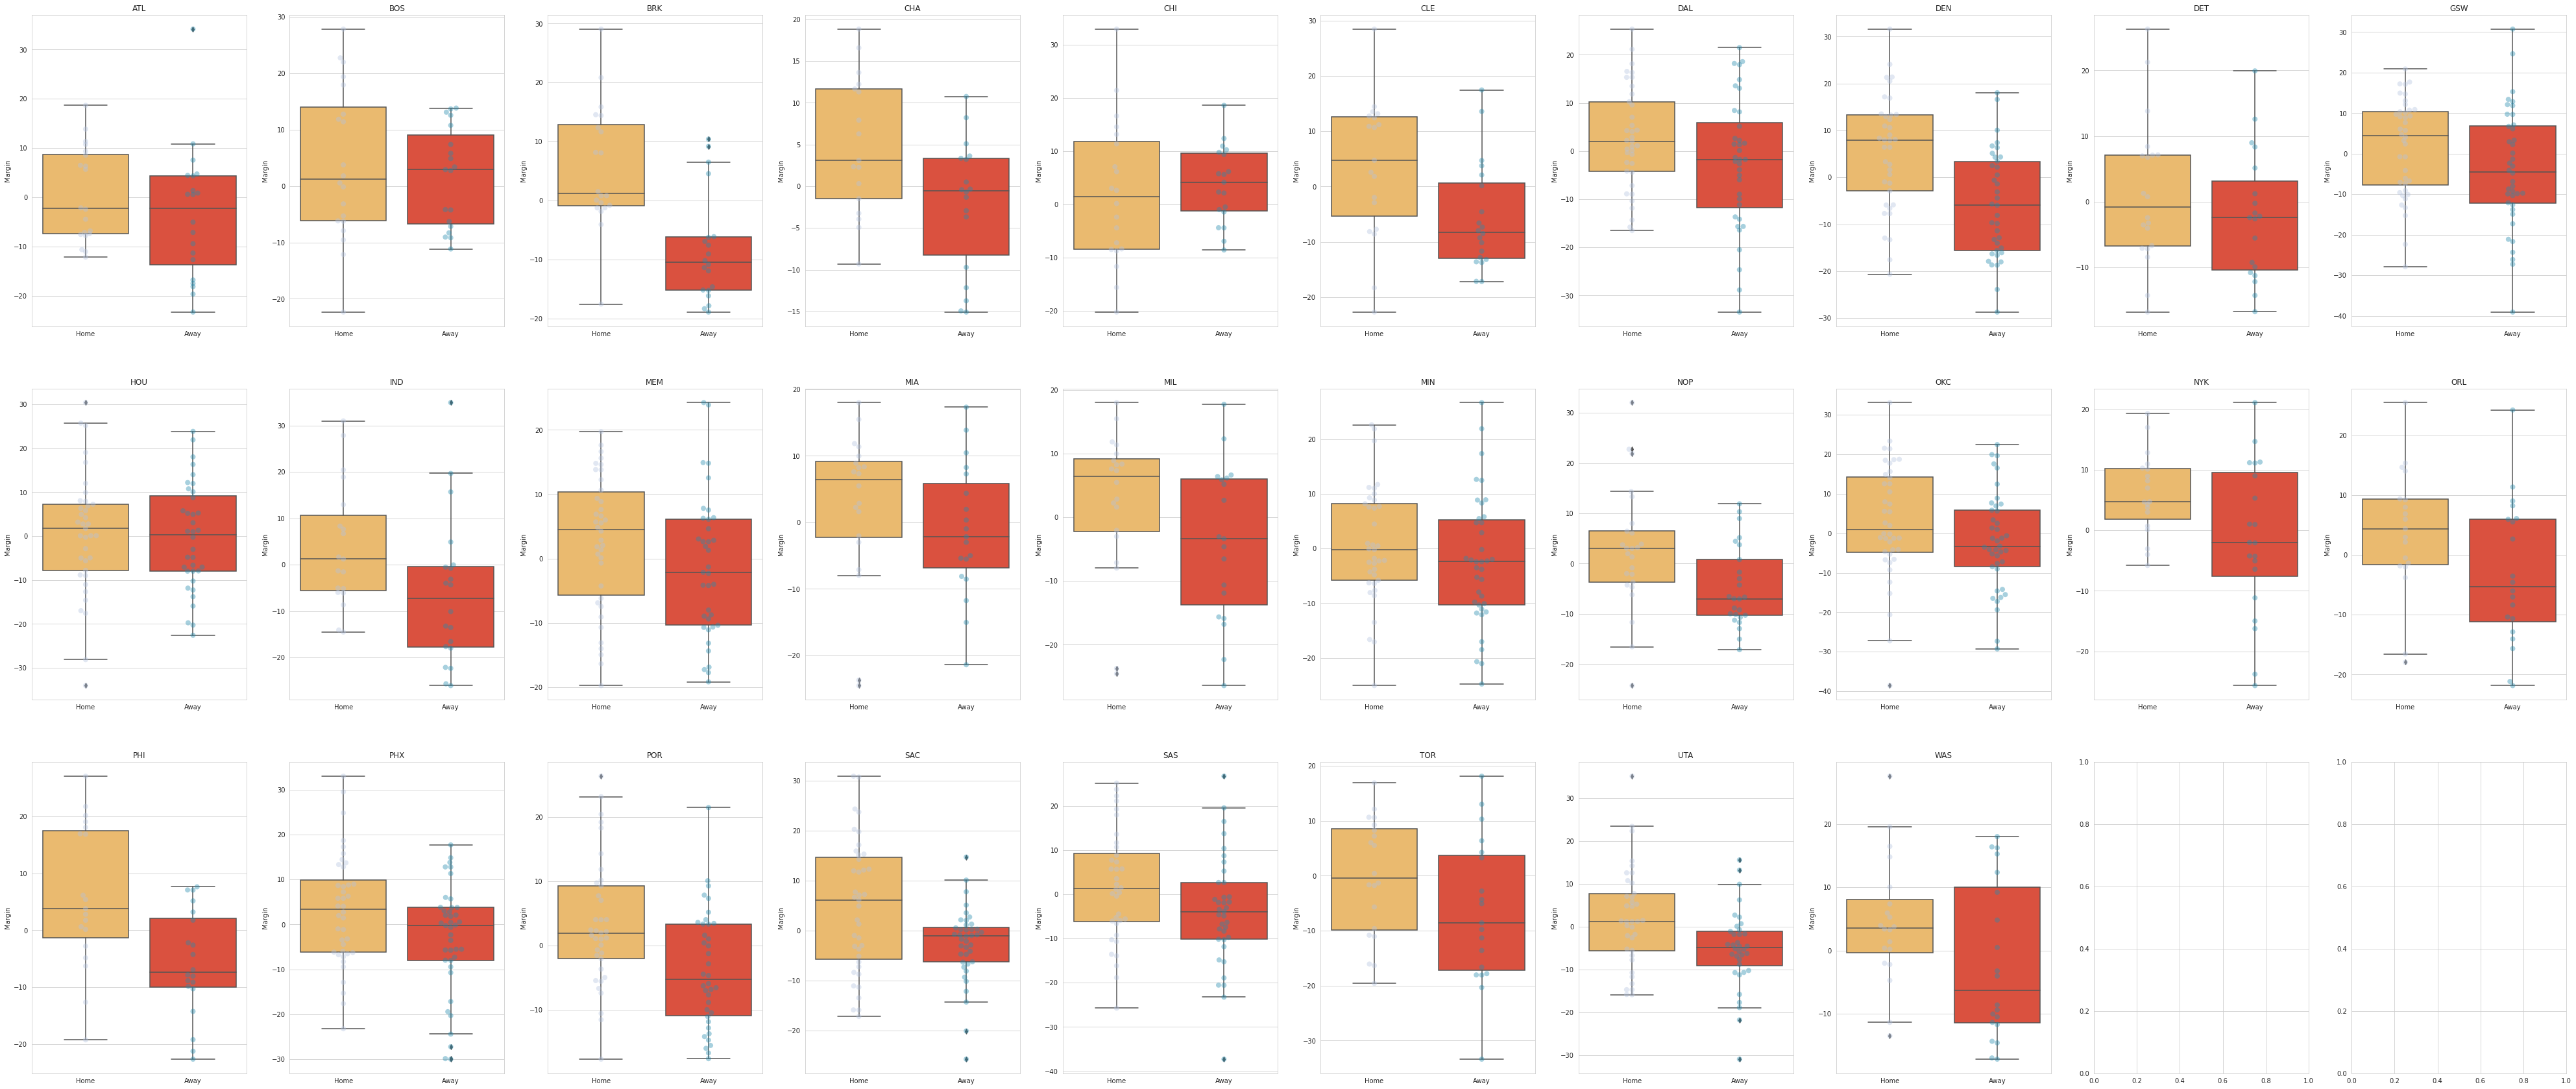

<Figure size 432x288 with 0 Axes>

In [159]:
figure, ((ax1,ax2,ax3,ax4,ax5, ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15, ax16, ax17, ax18, ax19, ax20), (ax21,ax22,ax23,ax24,ax25, ax26, ax27, ax28, ax29, ax30) ) = plt.subplots(nrows=3, ncols=10)

figure.set_size_inches(40,15)

sns.set_style("whitegrid")

sns.swarmplot(palette = "PuBuGn", data = ATL, alpha = 0.4, s = 8, ax = ax1)
sns.boxplot(palette = "YlOrRd", data = ATL, color = "1", ax = ax1)
ax1.set(ylabel= "Margin", title = "ATL")

sns.swarmplot(palette = "PuBuGn", data = BOS, alpha = 0.4, s = 8, ax = ax2)
sns.boxplot(palette = "YlOrRd", data = BOS, color = "1", ax = ax2)
ax2.set(ylabel= "Margin", title = "BOS")

sns.swarmplot(palette = "PuBuGn", data = BRK, alpha = 0.4, s = 8, ax = ax3)
sns.boxplot(palette = "YlOrRd", data = BRK, color = "1", ax = ax3)
ax3.set(ylabel= "Margin", title = "BRK")

sns.swarmplot(palette = "PuBuGn", data = CHA, alpha = 0.4, s = 8, ax = ax4)
sns.boxplot(palette = "YlOrRd", data = CHA, color = "1", ax = ax4)
ax4.set(ylabel= "Margin", title = "CHA")

sns.swarmplot(palette = "PuBuGn", data = CHI, alpha = 0.4, s = 8, ax = ax5)
sns.boxplot(palette = "YlOrRd", data = CHI, color = "1", ax = ax5)
ax5.set(ylabel= "Margin", title = "CHI")

sns.swarmplot(palette = "PuBuGn", data = CLE, alpha = 0.4, s = 8, ax = ax6)
sns.boxplot(palette = "YlOrRd", data = CLE, color = "1", ax = ax6)
ax6.set(ylabel= "Margin", title = "CLE")

sns.swarmplot(palette = "PuBuGn", data = DAL, alpha = 0.4, s = 8, ax = ax7)
sns.boxplot(palette = "YlOrRd", data = DAL, color = "1", ax = ax7)
ax7.set(ylabel= "Margin", title = "DAL")

sns.swarmplot(palette = "PuBuGn", data = DEN, alpha = 0.4, s = 8, ax = ax8)
sns.boxplot(palette = "YlOrRd", data = DEN, color = "1", ax = ax8)
ax8.set(ylabel= "Margin", title = "DEN")

sns.swarmplot(palette = "PuBuGn", data = DET, alpha = 0.4, s = 8, ax = ax9)
sns.boxplot(palette = "YlOrRd", data = DET, color = "1", ax = ax9)
ax9.set(ylabel= "Margin", title = "DET")

sns.swarmplot(palette = "PuBuGn", data = GSW, alpha = 0.4, s = 8, ax = ax10)
sns.boxplot(palette = "YlOrRd", data = GSW, color = "1", ax = ax10)
ax10.set(ylabel= "Margin", title = "GSW")

sns.swarmplot(palette = "PuBuGn", data = HOU, alpha = 0.4, s = 8, ax = ax11)
sns.boxplot(palette = "YlOrRd", data = HOU, color = "1", ax = ax11)
ax11.set(ylabel= "Margin", title = "HOU")

sns.swarmplot(palette = "PuBuGn", data = IND, alpha = 0.4, s = 8, ax = ax12)
sns.boxplot(palette = "YlOrRd", data = IND, color = "1", ax = ax12)
ax12.set(ylabel= "Margin", title = "IND")

sns.swarmplot(palette = "PuBuGn", data = MEM, alpha = 0.4, s = 8, ax = ax13)
sns.boxplot(palette = "YlOrRd", data = MEM, color = "1", ax = ax13)
ax13.set(ylabel= "Margin", title = "MEM")

sns.swarmplot(palette = "PuBuGn", data = MIA, alpha = 0.4, s = 8, ax = ax14)
sns.boxplot(palette = "YlOrRd", data = MIA, color = "1", ax = ax14)
ax14.set(ylabel= "Margin", title = "MIA")

sns.swarmplot(palette = "PuBuGn", data = MIL, alpha = 0.4, s = 8, ax = ax15)
sns.boxplot(palette = "YlOrRd", data = MIL, color = "1", ax = ax15)
ax15.set(ylabel= "Margin", title = "MIL")

sns.swarmplot(palette = "PuBuGn", data = MIN, alpha = 0.4, s = 8, ax = ax16)
sns.boxplot(palette = "YlOrRd", data = MIN, color = "1", ax = ax16)
ax16.set(ylabel= "Margin", title = "MIN")

sns.swarmplot(palette = "PuBuGn", data = NOP, alpha = 0.4, s = 8, ax = ax17)
sns.boxplot(palette = "YlOrRd", data = NOP, color = "1", ax = ax17)
ax17.set(ylabel= "Margin", title = "NOP")

sns.swarmplot(palette = "PuBuGn", data = OKC, alpha = 0.4, s = 8, ax = ax18)
sns.boxplot(palette = "YlOrRd", data = OKC, color = "1", ax = ax18)
ax18.set(ylabel= "Margin", title = "OKC")

sns.swarmplot(palette = "PuBuGn", data = NYK, alpha = 0.4, s = 8, ax = ax19)
sns.boxplot(palette = "YlOrRd", data = NYK, color = "1", ax = ax19)
ax19.set(ylabel= "Margin", title = "NYK")

sns.swarmplot(palette = "PuBuGn", data = ORL, alpha = 0.4, s = 8, ax = ax20)
sns.boxplot(palette = "YlOrRd", data = ORL, color = "1", ax = ax20)
ax20.set(ylabel= "Margin", title = "ORL")

sns.swarmplot(palette = "PuBuGn", data = PHI, alpha = 0.4, s = 8, ax = ax21)
sns.boxplot(palette = "YlOrRd", data = PHI, color = "1", ax = ax21)
ax21.set(ylabel= "Margin", title = "PHI")

sns.swarmplot(palette = "PuBuGn", data = PHX, alpha = 0.4, s = 8, ax = ax22)
sns.boxplot(palette = "YlOrRd", data = PHX, color = "1", ax = ax22)
ax22.set(ylabel= "Margin", title = "PHX")

sns.swarmplot(palette = "PuBuGn", data = POR, alpha = 0.4, s = 8, ax = ax23)
sns.boxplot(palette = "YlOrRd", data = POR, color = "1", ax = ax23)
ax23.set(ylabel= "Margin", title = "POR")

sns.swarmplot(palette = "PuBuGn", data = SAC, alpha = 0.4, s = 8, ax = ax24)
sns.boxplot(palette = "YlOrRd", data = SAC, color = "1", ax = ax24)
ax24.set(ylabel= "Margin", title = "SAC")

sns.swarmplot(palette = "PuBuGn", data = SAS, alpha = 0.4, s = 8, ax = ax25)
sns.boxplot(palette = "YlOrRd", data = SAS, color = "1", ax = ax25)
ax25.set(ylabel= "Margin", title = "SAS")

sns.swarmplot(palette = "PuBuGn", data = TOR, alpha = 0.4, s = 8, ax = ax26)
sns.boxplot(palette = "YlOrRd", data = TOR, color = "1", ax = ax26)
ax26.set(ylabel= "Margin", title = "TOR")

sns.swarmplot(palette = "PuBuGn", data = UTA, alpha = 0.4, s = 8, ax = ax27)
sns.boxplot(palette = "YlOrRd", data = UTA, color = "1", ax = ax27)
ax27.set(ylabel= "Margin", title = "UTA")

sns.swarmplot(palette = "PuBuGn", data = WAS, alpha = 0.4, s = 8, ax = ax28)
sns.boxplot(palette = "YlOrRd", data = WAS, color = "1", ax = ax28)
ax28.set(ylabel= "Margin", title = "WAS")

# fig.set_size_inches(5, 15)

plt.show()
plt.savefig(dir + 'Team_margin.png')

#### 각 팀별 T-test 확인

In [128]:
stats.ttest_ind(ATL_home["Home"], ATL_away["Away"])

Ttest_indResult(statistic=1.122955195851025, pvalue=0.26850151080290524)

In [129]:
stats.ttest_ind(BOS_home["Home"], BOS_away["Away"])

Ttest_indResult(statistic=0.6200213056481745, pvalue=0.5390438503149249)

In [130]:
stats.ttest_ind(BRK_home["Home"], BRK_away["Away"])

Ttest_indResult(statistic=4.451782767849638, pvalue=7.235540369346336e-05)

In [131]:
stats.ttest_ind(CHA_home["Home"], CHA_away["Away"])

Ttest_indResult(statistic=2.624514115594548, pvalue=0.013043178897336288)

In [132]:
stats.ttest_ind(CHI_home["Home"], CHI_away["Away"])

Ttest_indResult(statistic=-0.4601786742260305, pvalue=0.6480810037712093)

In [133]:
stats.ttest_ind(CLE_home["Home"], CLE_away["Away"])

Ttest_indResult(statistic=2.5180089556177725, pvalue=0.01625882940525012)

In [134]:
stats.ttest_ind(DAL_home["Home"], DAL_away["Away"])

Ttest_indResult(statistic=1.8060898368244254, pvalue=0.07514259438025739)

In [135]:
stats.ttest_ind(DEN_home["Home"], DEN_away["Away"])

Ttest_indResult(statistic=4.127076495539513, pvalue=9.750378659117359e-05)

In [136]:
stats.ttest_ind(DET_home["Home"], DET_away["Away"])

Ttest_indResult(statistic=1.061807260212801, pvalue=0.29520491640267765)

In [137]:
stats.ttest_ind(GSW_home["Home"], GSW_away["Away"])

Ttest_indResult(statistic=1.8074305486729831, pvalue=0.07455071636449669)

In [138]:
stats.ttest_ind(HOU_home["Home"], HOU_away["Away"])

Ttest_indResult(statistic=0.2733357196558038, pvalue=0.7853886919125581)

In [139]:
stats.ttest_ind(IND_home["Home"], IND_away["Away"])

Ttest_indResult(statistic=2.1286371702759044, pvalue=0.04000678270178644)

In [140]:
stats.ttest_ind(MEM_home["Home"], MEM_away["Away"])

Ttest_indResult(statistic=1.6112354952123389, pvalue=0.11144409620687239)

In [141]:
stats.ttest_ind(MIA_home["Home"], MIA_away["Away"])

Ttest_indResult(statistic=1.0942303433824776, pvalue=0.2809265392490178)

In [142]:
stats.ttest_ind(MIL_home["Home"], MIL_away["Away"])

Ttest_indResult(statistic=2.810033718064995, pvalue=0.00787062120136739)

In [143]:
stats.ttest_ind(MIN_home["Home"], MIN_away["Away"])

Ttest_indResult(statistic=1.1223141737768776, pvalue=0.26540677476069)

In [144]:
stats.ttest_ind(NOP_home["Home"], NOP_away["Away"])

Ttest_indResult(statistic=2.559360361972692, pvalue=0.013692642581481366)

In [145]:
stats.ttest_ind(OKC_home["Home"], OKC_away["Away"])

Ttest_indResult(statistic=1.6394287340809148, pvalue=0.10510049403331083)

In [146]:
stats.ttest_ind(NYK_home["Home"], NYK_away["Away"])

Ttest_indResult(statistic=2.2767559871192393, pvalue=0.028678214192694198)

In [147]:
stats.ttest_ind(ORL_home["Home"], ORL_away["Away"])

Ttest_indResult(statistic=1.9592508839989498, pvalue=0.057650827902630854)

In [148]:
stats.ttest_ind(PHI_home["Home"], PHI_away["Away"])

Ttest_indResult(statistic=3.3397221036921705, pvalue=0.0019238106452234404)

In [149]:
stats.ttest_ind(PHX_home["Home"], PHX_away["Away"])

Ttest_indResult(statistic=2.2878950374946396, pvalue=0.0248528268481486)

In [150]:
stats.ttest_ind(POR_home["Home"], POR_away["Away"])

Ttest_indResult(statistic=3.2832507924486727, pvalue=0.0015768542529137229)

In [151]:
stats.ttest_ind(SAC_home["Home"], SAC_away["Away"])

Ttest_indResult(statistic=3.1069944224824138, pvalue=0.002646757874750898)

In [152]:
stats.ttest_ind(SAS_home["Home"], SAS_away["Away"])

Ttest_indResult(statistic=1.9034971167424612, pvalue=0.06102954164341242)

In [153]:
stats.ttest_ind(TOR_home["Home"], TOR_away["Away"])

Ttest_indResult(statistic=1.6050793468625686, pvalue=0.11697909913859363)

In [154]:
stats.ttest_ind(UTA_home["Home"], UTA_away["Away"])

Ttest_indResult(statistic=2.926128235922745, pvalue=0.004606371660670982)

In [155]:
stats.ttest_ind(WAS_home["Home"], WAS_away["Away"])

Ttest_indResult(statistic=1.814002595105816, pvalue=0.07757945259510372)

### T-test 결과 분석

#### Margin의 유의미한 차이(home-away)를 보이는 Opponent는 
#### BRK, CLE, DEN(상대적으로 큰 차이) / 
#### IND, MEM, MIA, MIL, NOP, NYK, ORL, PHI, POR, TOR, WAS


---
 
  


#### P-value < 0.05인 경우는 

#### BRK, DEN / IND, MIL, NOP, NYK, PHI, PHX, POR, SAC, UTA로 확인



---


#### 동부팀의 경우 서부팀에 비해 경기수가 적기 때문에 P-value가 다소 높게 나오는 경향이 있음을 주의하고, 충분한 경기수를 치른 서부팀 중 MIN와 HOU을 제외하면 홈/원정 격차가 존재한다고 말할 수 있음

## 5.홈-원정 세부 stat 살펴보기

---

상대팀에 따른 홈과 원정의 결과를 살펴본 결과 응원의 실효성에 의문이 생기는 결론이 나왔습니다. 그렇다면 경기 세부적으로 홈코트 어드밴티지는 어느 항목에 영향을 미쳤는지 알아보고자 합니다.

---
*참고사항
FG(Field Goal) : 야투성공개수  
FGA(Field Goal Attempt) : 야투시도개수  
FG% : FG / FGA  
3P : 3 point 성공개수  
3PA : 3 point 시도개수  
FT(Free Throw) : 자유투 성공개수  
FTA(Free Throw Attempt) : 자유투 시도개수  
ORB(Offence Rebound) : 공격리바운드 개수  
TRB(Total Rebound) : 총 리바운드 개수  
AST(Assist) : 어시스트 개수  
STL(Steal) : 스틸 개수  
BLK(Block) : 블락 개수  
TOV(Turnover) : 실책개수  
PF(Personal Foul) : 반칙개수  

In [161]:
NBA = pd.read_csv(dir + "NBA.csv")

NBA.head(5)

,Season,G,Date,Stadium,Opponent,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG_opp,FGA_opp,FG%_opp,3P_opp,3PA_opp,3P%_opp,FT_opp,FTA_opp,FT%_opp,ORB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp
0,1999,1,1999-11-02,NaN,Seattle SuperSonics,L,92,104,35,78,0.449,6,16,0.375,16,27,0.593,12,45,14,4,9,17,24,NaN,33,87,0.379,8,24,0.333,33,42,0.786,14,56,20,6,9,10,22
1,1999,2,1999-11-03,@,Portland Trail Blazers,L,98,121,36,80,0.450,1,8,0.125,25,30,0.833,10,29,15,10,2,11,27,NaN,34,95,0.358,7,33,0.212,17,23,0.739,15,52,18,5,4,12,29
2,1999,3,1999-11-05,NaN,Philadelphia 76ers,W,91,81,30,69,0.435,4,8,0.500,27,31,0.871,12,52,16,5,19,29,26,NaN,43,89,0.483,15,35,0.429,11,15,0.733,6,35,28,6,6,12,23
3,1999,4,1999-11-08,NaN,Utah Jazz,L,79,94,25,73,0.342,2,14,0.143,27,35,0.771,9,36,11,5,5,14,22,NaN,40,93,0.430,6,24,0.250,30,40,0.750,12,48,22,12,8,8,24
4,1999,5,1999-11-10,NaN,San Antonio Spurs,L,94,99,32,71,0.451,5,13,0.385,25,33,0.758,8,40,13,8,8,18,28,NaN,38,98,0.388,15,41,0.366,22,25,0.880,16,42,21,11,7,13,27


In [212]:
#결측치 확인

NBA.isnull().sum()

Season            0
G                 0
Date              0
Stadium         812
Opponent          0
W/L               0
Tm                0
Opp               0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
FT                0
FTA               0
FT%               0
ORB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
Unnamed: 24    1624
FG_opp            0
FGA_opp           0
FG%_opp           0
3P_opp            0
3PA_opp           0
3P%_opp           0
FT_opp            0
FTA_opp           0
FT%_opp           0
ORB_opp           0
TRB_opp           0
AST_opp           0
STL_opp           0
BLK_opp           0
TOV_opp           0
PF_opp            0
dtype: int64

In [0]:
#홈-원정 데이터 분리

home_stat = NBA["Stadium"] != "@"
home_stat = NBA[home_stat]

away_stat = NBA["Stadium"] == "@"
away_stat = NBA[away_stat]

home_stat = home_stat.reset_index(drop = True)
away_stat = away_stat.reset_index(drop = True)

In [206]:
home_stat

,Season,G,Date,Stadium,Opponent,W/L,Tm,Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG_opp,FGA_opp,FG%_opp,3P_opp,3PA_opp,3P%_opp,FT_opp,FTA_opp,FT%_opp,ORB_opp,TRB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp
0,1999,1,1999-11-02,NaN,Seattle SuperSonics,L,92,104,35,78,0.449,6,16,0.375,16,27,0.593,12,45,14,4,9,17,24,NaN,33,87,0.379,8,24,0.333,33,42,0.786,14,56,20,6,9,10,22
1,1999,3,1999-11-05,NaN,Philadelphia 76ers,W,91,81,30,69,0.435,4,8,0.500,27,31,0.871,12,52,16,5,19,29,26,NaN,43,89,0.483,15,35,0.429,11,15,0.733,6,35,28,6,6,12,23
2,1999,4,1999-11-08,NaN,Utah Jazz,L,79,94,25,73,0.342,2,14,0.143,27,35,0.771,9,36,11,5,5,14,22,NaN,40,93,0.430,6,24,0.250,30,40,0.750,12,48,22,12,8,8,24
3,1999,5,1999-11-10,NaN,San Antonio Spurs,L,94,99,32,71,0.451,5,13,0.385,25,33,0.758,8,40,13,8,8,18,28,NaN,38,98,0.388,15,41,0.366,22,25,0.880,16,42,21,11,7,13,27
4,1999,11,1999-11-23,NaN,New York Knicks,W,100,95,31,77,0.403,10,31,0.323,28,32,0.875,10,41,13,9,6,13,27,NaN,40,97,0.412,10,26,0.385,26,28,0.929,14,53,18,4,8,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2018,77,2019-03-30,NaN,Cleveland Cavaliers,W,132,108,53,85,0.624,15,33,0.455,11,16,0.688,9,44,33,5,5,16,25,NaN,33,74,0.446,5,15,0.333,24,32,0.750,11,47,20,8,1,18,21
808,2018,78,2019-03-31,NaN,Memphis Grizzlies,W,113,96,36,75,0.480,7,27,0.259,34,38,0.895,5,47,23,9,5,18,23,NaN,35,73,0.479,2,10,0.200,30,39,0.769,11,40,25,7,8,13,21
809,2018,79,2019-04-03,NaN,Houston Rockets,L,103,135,38,82,0.463,8,26,0.308,19,31,0.613,9,38,27,11,2,16,22,NaN,40,85,0.471,10,19,0.526,22,30,0.733,14,53,31,8,1,13,29
810,2018,80,2019-04-05,NaN,Los Angeles Lakers,L,117,122,40,91,0.440,10,29,0.345,27,31,0.871,7,45,29,7,8,11,22,NaN,43,89,0.483,10,21,0.476,19,27,0.704,10,53,20,7,6,20,32


In [0]:
#우리팀 자유투 성공률
FT = pd.concat([home_stat["FT%"], away_stat["FT%"]], axis = 1)
FT.columns = ["Home", "Away"]

#상대팀 자유투 성공률
FT_opp = pd.concat([home_stat["FT%_opp"], away_stat["FT%_opp"]], axis = 1)
FT_opp.columns = ["Home", "Away"]

# #우리팀 야투 성공률
# FG = pd.concat([Home_1["FG%"], Away_1["FG%"]], axis = 1)
# FG.columns = ["Home", "Away"]

# #상대팀 야투 성공률
# FG_opp = pd.concat([Home_1["FG%_opp"], Away_1["FG%_opp"]], axis = 1)
# FG_opp.columns = ["Home", "Away"]

#eFG%(efficiency Field Goal Percentage) :  3점의 가치를 2점에 비해 보정해주기 위한 통계 
# ex) A선수 : 4/10 (3점 2개 포함) vs B선수 : 5/10  eFG(A) = 50% = eFG(B)
#우리팀 야투 성공률(eFG) : (FG + (0.5 * 3P)) / FGA        
eFG = pd.concat([(home_stat["FG"] + 0.5*home_stat["3P"])/home_stat["FGA"], 
                 (away_stat["FG"] + 0.5*away_stat["3P"])/away_stat["FGA"]], axis = 1)
eFG.columns = ["Home", "Away"]

#상대팀 야투 성공률(eFG)
eFG_opp = pd.concat([(home_stat["FG_opp"] + 0.5*home_stat["3P_opp"])/home_stat["FGA_opp"], 
                 (away_stat["FG_opp"] + 0.5*away_stat["3P_opp"])/away_stat["FGA_opp"]], axis = 1)
eFG_opp.columns = ["Home", "Away"]

#FTA_diff = 우리팀 자유투 시도개수 - 상대팀 자유투 시도개수
FTA_diff = pd.concat([home_stat["FTA"] - home_stat["FTA_opp"], 
                      away_stat["FTA"] - away_stat["FTA_opp"]], axis = 1)
FTA_diff.columns = ["Home", "Away"]

#PF_diff = 우리팀 파울 개수 - 상대팀 파울 개수
PF_diff = pd.concat([home_stat["PF"] - home_stat["PF_opp"], 
                      away_stat["PF"] - away_stat["PF_opp"]], axis = 1)
PF_diff.columns = ["Home", "Away"]

#TOV_diff = 우리팀 턴오버 개수 - 상대팀 턴오버 개수
TOV_diff = pd.concat([home_stat["TOV"] - home_stat["TOV_opp"], 
                      away_stat["TOV"] - away_stat["TOV_opp"]], axis = 1)
TOV_diff.columns = ["Home", "Away"]

#STL_diff = 우리팀 스틸 개수 - 상대팀 스틸 개수
STL_diff = pd.concat([home_stat["STL"] - home_stat["STL_opp"], 
                      away_stat["STL"] - away_stat["STL_opp"]], axis = 1)
STL_diff.columns = ["Home", "Away"]

#AST_diff = 우리팀 어시스트 개수 - 상대팀 어시스트 개수
AST_diff = pd.concat([home_stat["AST"] - home_stat["AST_opp"], 
                      away_stat["AST"] - away_stat["AST_opp"]], axis = 1)
AST_diff.columns = ["Home", "Away"]

#AST_TOV = AST/TOV
#어시스트 턴오버 비율은 보통 안정적인 경기운영을 보는 지표로 사용된다
AST_TOV = pd.concat([home_stat["AST"] / home_stat["TOV"], 
                      away_stat["AST"] / away_stat["TOV"]], axis = 1)
AST_TOV.columns = ["Home", "Away"]

#BLK_diff = 우리팀 블락 개수 / (우리팀 블락 개수 + 상대팀 블락 개수)
BLK_diff = pd.concat([home_stat["BLK"] / (home_stat["BLK"] + home_stat["BLK_opp"]), 
                      away_stat["BLK"] / (away_stat["BLK"] + away_stat["BLK_opp"])],  axis = 1)
BLK_diff.columns = ["Home", "Away"]

#ORB_diff = 우리팀 공격리바운드 개수 / 우리팀 총 리바운드 개수
ORB_diff = pd.concat([home_stat["ORB"] / home_stat["TRB"], 
                      away_stat["ORB"] / away_stat["TRB"]], axis = 1)
ORB_diff.columns = ["Home", "Away"]
                       
#DRB_diff = 우리팀 수비리바운드 개수 / 우리팀 총 리바운드 개수
DRB_diff = pd.concat([(home_stat["TRB"] - home_stat["ORB"]) / home_stat["TRB"], 
                      (away_stat["TRB"] - away_stat["ORB"]) / away_stat["TRB"]], axis = 1)
DRB_diff.columns = ["Home", "Away"]

In [208]:
#결측치 확인 - 제거 (0)
BLK_diff.loc[BLK_diff.isnull()["Away"]]
BLK_diff["Away"] = BLK_diff["Away"].fillna(0)

pd.to_numeric(BLK_diff["Away"])

0      0.333333
1      0.571429
2      0.500000
3      0.363636
4      0.666667
         ...   
807    0.461538
808    0.500000
809    0.444444
810    0.500000
811    0.666667
Name: Away, Length: 812, dtype: float64

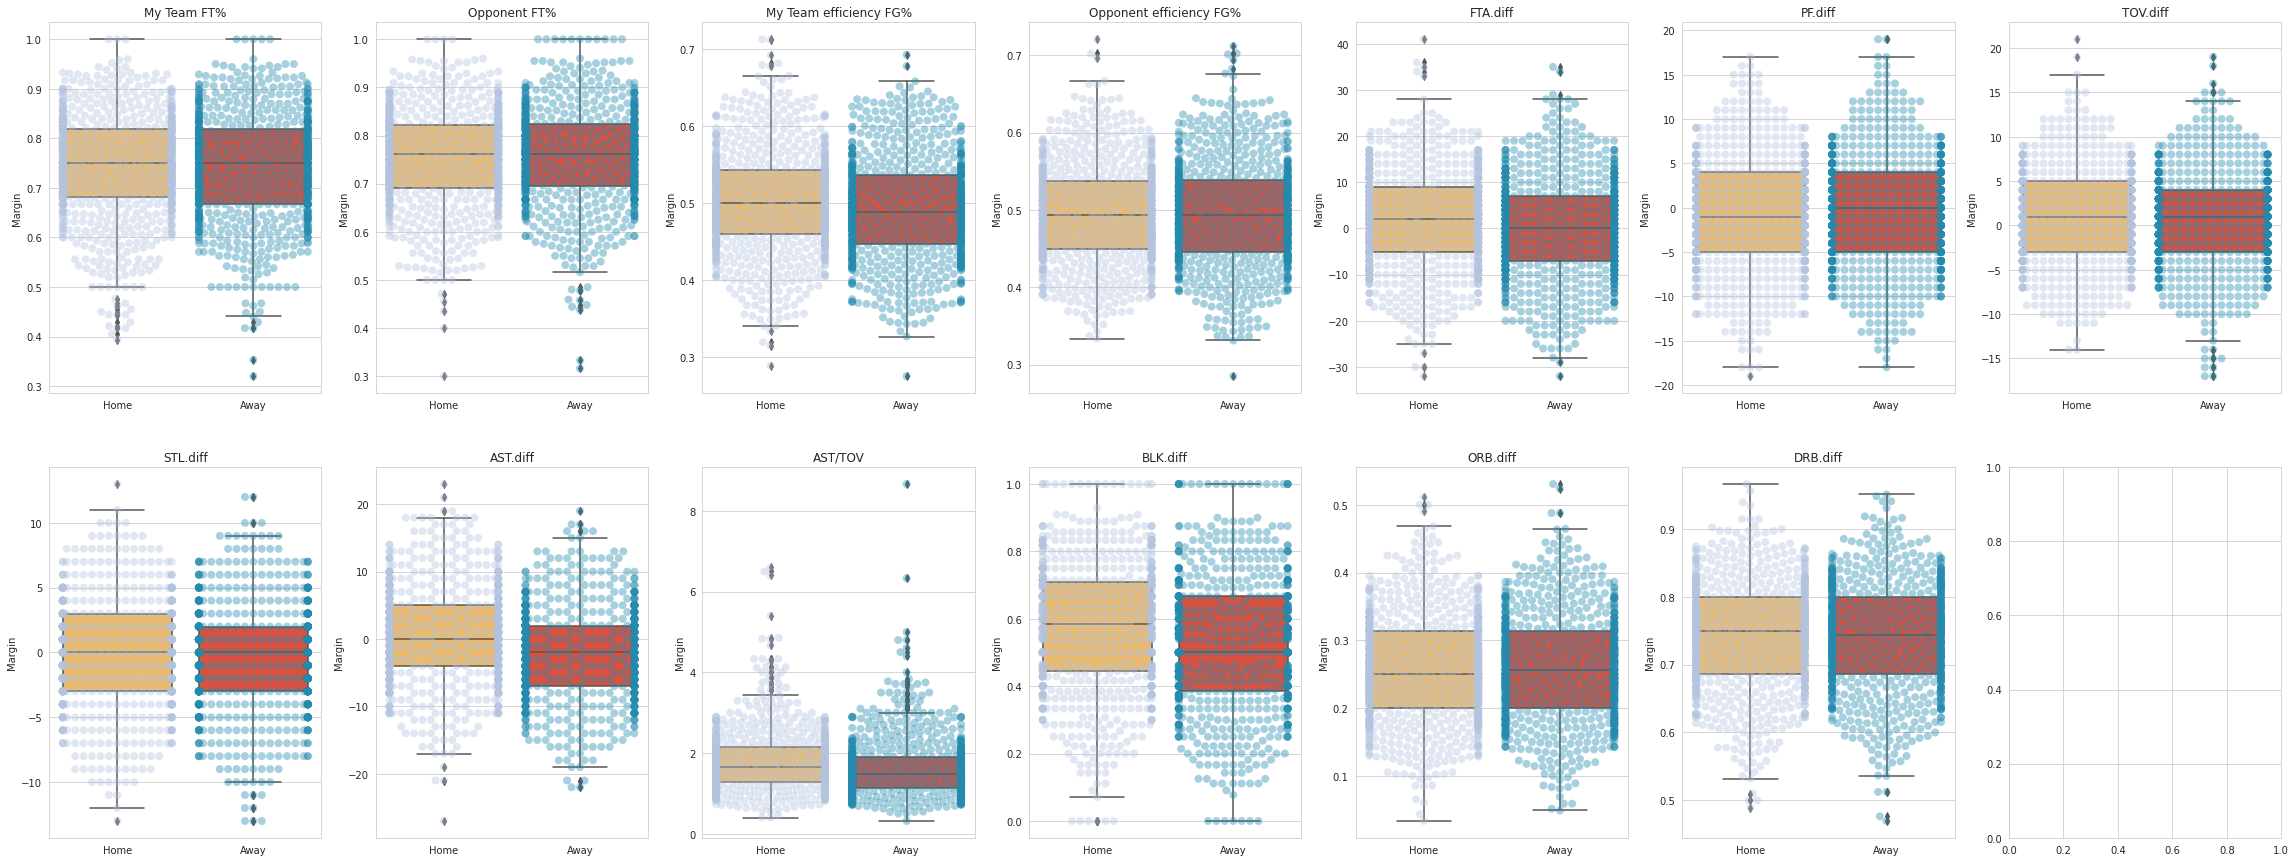

In [166]:
figure, ((ax1,ax2,ax3,ax4,ax5, ax6, ax7), (ax8,ax9,ax10,ax11,ax12,ax13,ax14)) = plt.subplots(nrows=2, ncols=7)

figure.set_size_inches(40,15)

sns.set_style("whitegrid")

sns.swarmplot(palette = "PuBuGn", data = FT, alpha = 0.4, s = 8, ax = ax1)
sns.boxplot(palette = "YlOrRd", data = FT, color = "1", ax = ax1)
ax1.set(ylabel= "Margin", title = "My Team FT%")

sns.swarmplot(palette = "PuBuGn", data = FT_opp, alpha = 0.4, s = 8, ax = ax2)
sns.boxplot(palette = "YlOrRd", data = FT_opp, color = "1", ax = ax2)
ax2.set(ylabel= "Margin", title = "Opponent FT%")

sns.swarmplot(palette = "PuBuGn", data = eFG, alpha = 0.4, s = 8, ax = ax3)
sns.boxplot(palette = "YlOrRd", data = eFG, color = "1", ax = ax3)
ax3.set(ylabel= "Margin", title = "My Team efficiency FG%")

sns.swarmplot(palette = "PuBuGn", data = eFG_opp, alpha = 0.4, s = 8, ax = ax4)
sns.boxplot(palette = "YlOrRd", data = eFG_opp, color = "1", ax = ax4)
ax4.set(ylabel= "Margin", title = "Opponent efficiency FG%")

sns.swarmplot(palette = "PuBuGn", data = FTA_diff, alpha = 0.4, s = 8, ax = ax5)
sns.boxplot(palette = "YlOrRd", data = FTA_diff, color = "1", ax = ax5)
ax5.set(ylabel= "Margin", title = "FTA.diff")

sns.swarmplot(palette = "PuBuGn", data = PF_diff, alpha = 0.4, s = 8, ax = ax6)
sns.boxplot(palette = "YlOrRd", data = PF_diff, color = "1", ax = ax6)
ax6.set(ylabel= "Margin", title = "PF.diff")

sns.swarmplot(palette = "PuBuGn", data = TOV_diff, alpha = 0.4, s = 8, ax = ax7)
sns.boxplot(palette = "YlOrRd", data = TOV_diff, color = "1", ax = ax7)
ax7.set(ylabel= "Margin", title = "TOV.diff")

sns.swarmplot(palette = "PuBuGn", data = STL_diff, alpha = 0.4, s = 8, ax = ax8)
sns.boxplot(palette = "YlOrRd", data = STL_diff, color = "1", ax = ax8)
ax8.set(ylabel= "Margin", title = "STL.diff")

sns.swarmplot(palette = "PuBuGn", data = AST_diff, alpha = 0.4, s = 8, ax = ax9)
sns.boxplot(palette = "YlOrRd", data = AST_diff, color = "1", ax = ax9)
ax9.set(ylabel= "Margin", title = "AST.diff")

sns.swarmplot(palette = "PuBuGn", data = AST_TOV, alpha = 0.4, s = 8, ax = ax10)
sns.boxplot(palette = "YlOrRd", data = AST_TOV, color = "1", ax = ax10)
ax10.set(ylabel= "Margin", title = "AST/TOV")

sns.swarmplot(palette = "PuBuGn", data = BLK_diff, alpha = 0.4, s = 8, ax = ax11)
sns.boxplot(palette = "YlOrRd", data = BLK_diff, color = "1", ax = ax11)
ax11.set(ylabel= "Margin", title = "BLK.diff")

sns.swarmplot(palette = "PuBuGn", data = ORB_diff, alpha = 0.4, s = 8, ax = ax12)
sns.boxplot(palette = "YlOrRd", data = ORB_diff, color = "1", ax = ax12)
ax12.set(ylabel= "Margin", title = "ORB.diff")

sns.swarmplot(palette = "PuBuGn", data = DRB_diff, alpha = 0.4, s = 8, ax = ax13)
sns.boxplot(palette = "YlOrRd", data = DRB_diff, color = "1", ax = ax13)
ax13.set(ylabel= "Margin", title = "DRB.diff")

# sns.swarmplot(palette = "PuBuGn", data = FT_tm, alpha = 0.4, s = 8)
# sns.boxplot(palette = "YlOrRd", data = FT_tm, color = "1",)

# fig.set_size_inches(5, 15)

plt.show()

In [211]:
FT = stats.ttest_ind(home_stat["FT"], away_stat["FT"])
FT_opp = stats.ttest_ind(home_stat["FT_opp"], away_stat["FT_opp"])
eFG = stats.ttest_ind(eFG["Home"], eFG["Away"])
eFG_opp = stats.ttest_ind(eFG_opp["Home"], eFG_opp["Away"])
FTA = stats.ttest_ind(home_stat["FTA"], away_stat["FTA"])
PF_diff = stats.ttest_ind(PF_diff["Home"], PF_diff["Away"])
TOV_diff = stats.ttest_ind(TOV_diff["Home"], TOV_diff["Away"])
STL_diff = stats.ttest_ind(STL_diff["Home"], STL_diff["Away"])
AST_diff = stats.ttest_ind(AST_diff["Home"], AST_diff["Away"])
AST_TOV = stats.ttest_ind(AST_TOV["Home"], AST_TOV["Away"])
BLK_diff = stats.ttest_ind(BLK_diff["Home"], BLK_diff["Away"])
ORB_diff = stats.ttest_ind(ORB_diff["Home"], ORB_diff["Away"])
DRB_diff = stats.ttest_ind(DRB_diff["Home"], DRB_diff["Away"])

print(FT, FT_opp, eFG, eFG_opp, FTA, PF_diff, TOV_diff, 
      STL_diff, AST_diff, AST_TOV, BLK_diff, ORB_diff, DRB_diff, sep = '\n')

Ttest_indResult(statistic=2.7272052170776333, pvalue=0.006456158560975294)
Ttest_indResult(statistic=-1.3049609344515507, pvalue=0.192091249907383)
Ttest_indResult(statistic=3.2487119019782966, pvalue=0.0011830058411863185)
Ttest_indResult(statistic=0.11102843763362494, pvalue=0.9116075325983206)
Ttest_indResult(statistic=2.98743542410689, pvalue=0.002855512444160509)
Ttest_indResult(statistic=-1.3256020795066705, pvalue=0.18515820468683528)
Ttest_indResult(statistic=0.8034986550740818, pvalue=0.4218043052054763)
Ttest_indResult(statistic=1.2960450758895925, pvalue=0.1951443387807256)
Ttest_indResult(statistic=7.460041139430583, pvalue=1.4026703869934714e-13)
Ttest_indResult(statistic=4.563130850531057, pvalue=5.4187236020322586e-06)
Ttest_indResult(statistic=5.210130136757386, pvalue=2.1287511351856322e-07)
Ttest_indResult(statistic=-0.5602357195855147, pvalue=0.5753960322702034)
Ttest_indResult(statistic=0.5602357195855288, pvalue=0.5753960322701936)


#### 1차 지표 의미 분석 실시

p-value 오름차순으로 유의미한 것을 살펴보면
1. AST_diff(상대팀과의 어시스트 차이)
2. BLK_diff(블락 % 차이)
3. AST_TOV(어시스트/턴오버 비율)
4. eFG(LAC 야투율)
5. FTA(자유투 시도 개수)


---


이를 통해 예측할 수 있는 것은 홈코트에서는 유기적인 볼 움직임에 의해 어시스트를 많이 만들어낸다는 것(1,3 + 상승한 LAC eFG)과 상대에 비해 에너지 레벨이 더 높을 수 있다는 점과(2,4) 원정에 비해 파울을 얻기가 좀 더 용이하다(like 심판이 좀 더 홈팀에게 유리한 콜을 한다)는 것(원정보다 홈에서 높은 자유투 시도 개수 + 이와 반대 양상을 보이는 파울 개수)입니다.   

---  

여기서 눈여겨 볼만한 것은 FT입니다. 농구에서 가장 주위에 영향을 안 받고, 응원의 영향을 많이 받을 것이라 생각되어지는(농구 경기를 한번쯤 봤다면 상대팀 선수의 자유투 시도일 때 홈팀팬들의 방해가 뜨거운 것을 본 적이 있을 것입니다) 자유투 성공확률입니다.  
(농구 경기에서 가장 독립시행에 가까움)  

+ 허나 예상과는 다르게 자유투는 홈/원정의 여부에 영향을 받지 않습니다.  
+ 이는 0.introduction에서의 예상과는 다르게 익숙한 골대에 성공률이 올라가지 않는다는 것을 보여줍니다


## 6.아쉬운점

---

**<내부적>**  
-SRS의 경우 이름 그대로 단순한 Margin 보정 지표이기 때문에 문제점이 존재  
  (1)모든 경기에 똑같은 가중치  
        가비지 승리의 경우 큰 Margin의 획득이 가능하여 승리에 대한 중요성 보정 불가능한 점  
          
        ex) 50점 승 + 20점 패 vs 14점 승 2개 (사람은 뒤에 중요 / SRS 그거 반영 X)
  (2)공격 중심 팀에 유리한 지표 (수비 중심 팀의 경우 과소평가 가능성 높음)  
  
(3)휴식이나 부상등의 요소 고려 불가  

---
  
**<개인적>**  
(1)웹 크롤링의 미숙으로 인해 raw data를 크롤링하는데 실패한 것  
+ basketball-reference의 자료를 손으로 긁어서 NBA.csv를 만든 것 

(2)사실상 홈코트 어드밴티지가 중요한 토너먼트 Playoff에서의 영향력을 확인하고 싶었으나 통계적으로 유의한 경기 수가 부족했던 점  

(3)당초 NBA자료를 토대로 이동거리가 상대적으로 짧은 한국 KBL에 적용하고자 하였으나 KBL 레퍼런스에는 팀별 시즌 게임 로그가 있지 않아 적용에 실패  

(4)SRS로는 팀 전력의 정규화가 한계가 있다고 생각하지만, 이보다 더 나은 통계적 지표를 통해 Margin의 정규화에 실패한 점  
+ Team pace와 season pace 등의 자료를 이용하면 조금더 정규화가 이뤄질 수 있지 않을까?

